In [1]:
import sqlite3

# Create database file
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the 'sales' table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
cursor.executemany("""
INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)
""", [
    ('Soap', 10, 30),
    ('Shampoo', 5, 100),
    ('Toothpaste', 7, 50),
    ('Soap', 8, 30),
    ('Shampoo', 3, 100)
])

conn.commit()
print("✅ sales_data.db created and populated with data.")


✅ sales_data.db created and populated with data.


📊 Sales Summary:
      product  total_qty  revenue
0     Shampoo          8    800.0
1        Soap         18    540.0
2  Toothpaste          7    350.0


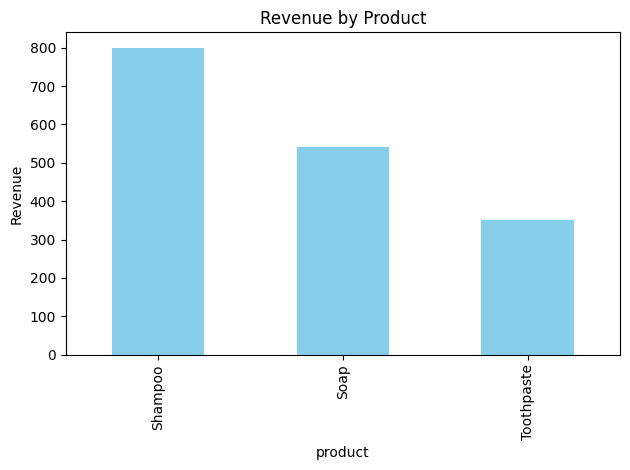

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# SQL query to summarize sales
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

# Run the query and load results into DataFrame
df = pd.read_sql_query(query, conn)

# Show output
print("📊 Sales Summary:")
print(df)

# Bar chart
df.plot(kind='bar', x='product', y='revenue', color='skyblue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

# Close connection
conn.close()


In [3]:
from google.colab import files
files.download("sales_chart.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>